In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 6.5]

import pickle

In [5]:
def get_spectra_exp(e0, tot_rate_hz, exposure_time, res=0):
    total_events = tot_rate_hz * exposure_time
    return np.random.exponential(size=int(total_events))*e0 + np.random.normal(size=int(total_events))*res

In [2]:
with open('simulation_dict_2.pkl', 'rb') as f:
    sim_dict = pickle.load(f)

In [3]:
energy_bins = list(sim_dict['vs_energy_scale_events_dict'].keys())[0:6]
print(energy_bins)

rate_bins = list(sim_dict['vs_rate_events_dict'].keys())[0:6]
print(rate_bins)

resolution_bins = list(sim_dict['vs_resolution_limits_dict'].keys())[0:7]
print(resolution_bins)

exposure_bins = list(sim_dict['vs_exposure_limits_dict'].keys())[0:4]
print(exposure_bins)

dm_masses = sim_dict['vs_energy_scale_limits_dict']['masses_GeV']
print(dm_masses)

exposure_s = sim_dict['vs_resolution_limits_dict']['exposure_seconds']

['10', '20', '30', '50', '100', '200']
['0.2', '0.3', '0.5', '1', '2', '5']
['0.2', '0.3', '0.5', '1', '2', '3', '5']
['300', '1000', '3000', '10000']
[0.1        0.11444193 0.13096955 0.14988408 0.17153024 0.19630251
 0.22465239 0.25709653 0.29422623 0.33671817 0.38534677 0.44099828
 0.50468695 0.57757348 0.66098624 0.7564454  0.86569072 0.99071316
 1.13379126 1.2975326  1.48492135 1.69937265 1.94479485 2.22566076
 2.54708912 2.91493795 3.33591124 3.8176812  4.36902804 5.        ]


In [6]:
vs_energy_scale_events_dict = {}
i = 0
while i < len(energy_bins):
    vs_energy_scale_events_dict[str(energy_bins[i])] = get_spectra_exp(float(energy_bins[i]), 20, exposure_s*100)
    i += 1
vs_energy_scale_events_dict['note'] = 'key is energy scale of exponentially distributed events in eV'
vs_energy_scale_events_dict['rate'] = '20 Hz'
    
sim_dict['vs_energy_scale_events_dict'] = vs_energy_scale_events_dict

In [7]:
vs_rate_events_dict = {}
i = 0
while i < len(rate_bins):
    vs_rate_events_dict[str(rate_bins[i])] = get_spectra_exp(20, float(rate_bins[i]), exposure_s*100)
    i += 1
vs_rate_events_dict['note'] = 'key is rate of exponentially distributed events in Hz'
vs_rate_events_dict['energy_scale'] = '20 eV'
    
sim_dict['vs_rate_events_dict'] = vs_rate_events_dict

In [8]:
vs_energy_events = []
vs_energy_limits = []
i = 0
while i < len(energy_bins):
    vs_energy_events.append(sim_dict['vs_energy_scale_events_dict'][energy_bins[i]])
    vs_energy_limits.append(sim_dict['vs_energy_scale_limits_dict'][energy_bins[i]])
    i += 1
    
vs_rate_events = []
vs_rate_limits = []
i = 0
while i < len(energy_bins):
    vs_rate_events.append(sim_dict['vs_rate_events_dict'][rate_bins[i]])
    vs_rate_limits.append(sim_dict['vs_rate_limits_dict'][rate_bins[i]])
    i += 1
    
vs_resolution_limits = []
i = 0
while i < len(resolution_bins):
    vs_resolution_limits.append(sim_dict['vs_resolution_limits_dict'][resolution_bins[i]])
    i += 1

vs_exposure_limits = []
i = 0
while i < len(exposure_bins):
    vs_exposure_limits.append(sim_dict['vs_exposure_limits_dict'][exposure_bins[i]])
    i += 1

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


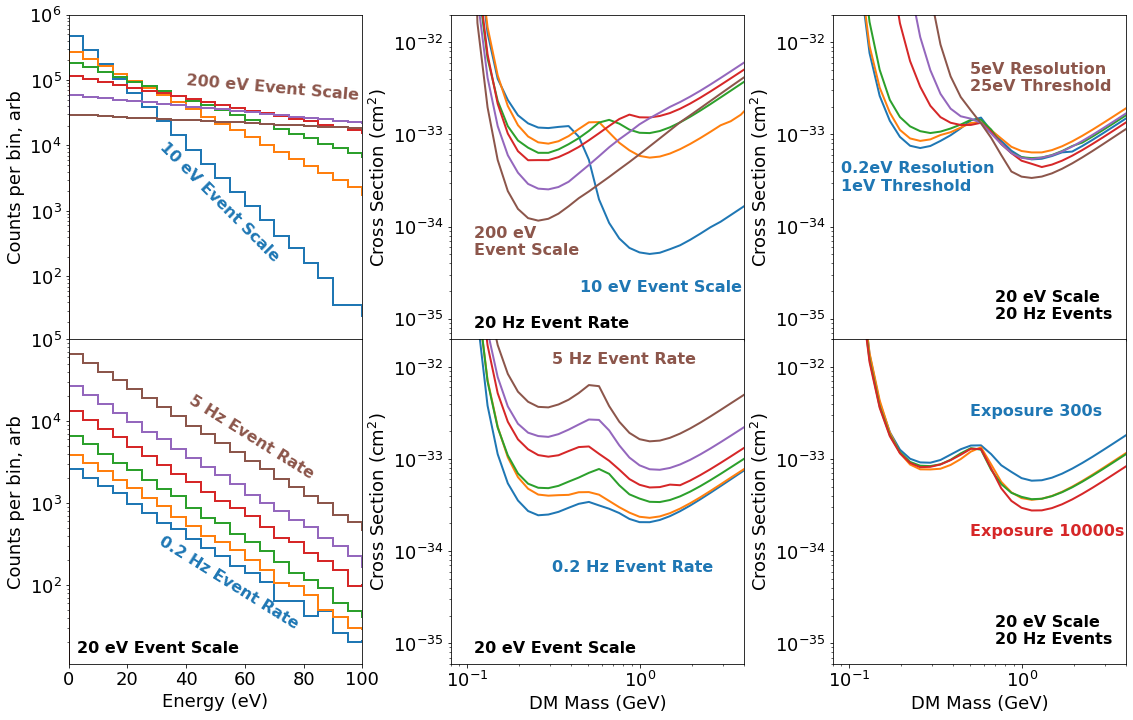

In [9]:
font = {'family': 'normal',
       'weight': 'normal',
       'size': 18}
mpl.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(16, 10))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace = 0.3)

bin_width = 5 #eV
bins = np.arange(0, 110, bin_width)

i = 0
while i < len(vs_energy_events):
    axs[0,0].hist(vs_energy_events[i], bins=bins, histtype = 'step',
                  label = "20 Hz Rate, " + str(energy_bins[i]) + " eV scale", linewidth = 2.0)
    i += 1
axs[0,0].set_yscale('log')
axs[0,0].set_xticks([])
#axs[0,0].legend()
#axs[0,0].set_xlabel("Energy (eV)")
#axs[0,0].set_ylabel("Counts per " + str(bin_width) + " eV")
axs[0,0].set_ylabel("Counts per bin, arb")
axs[0,0].text(3, 1.5, "20 Hz Event Rate", fontweight='bold', fontsize=16)
axs[0,0].text(30, 170, str(energy_bins[0]) + " eV Event Scale", color = 'C0', fontweight='bold', fontsize=16,
              rotation = 315)
axs[0,0].text(40, 50000, str(energy_bins[-1]) + " eV Event Scale", color = 'C' + str(len(energy_bins) - 1),
              fontweight='bold', fontsize=16, rotation = 355)
axs[0,0].set_xlim(0, 100)
axs[0,0].set_ylim(11, 1e6)

i = 0
while i < len(vs_rate_events):
    axs[1,0].hist(vs_rate_events[i], bins=bins, histtype = 'step',
                  label =str(rate_bins[i]) + " Hz Rate, " + str(20) + " eV scale", linewidth = 2.0)
    i += 1
axs[1,0].set_yscale('log')
#axs[1,0].legend()
axs[1,0].set_xlabel("Energy (eV)")
#axs[1,0].set_ylabel("Counts per " + str(bin_width) + " eV")
axs[1,0].set_ylabel("Counts per bin, arb")
#axs[1,0].sharex(axs[0,0])
axs[1,0].text(3, 15, "20 eV Event Scale", fontweight='bold', fontsize=16)
axs[1,0].text(30, 30, str(rate_bins[0]) + " Hz Event Rate", color = 'C0', fontweight='bold', fontsize=16,
              rotation = 328)
axs[1,0].text(40, 2000, str(rate_bins[-1]) + " Hz Event Rate", color = 'C' + str(len(rate_bins) - 1),
              fontweight='bold', fontsize=16, rotation = 328)
axs[1,0].set_xlim(0, 100)
axs[1,0].set_ylim(11, 1e5)



i = 0
while i < len(vs_energy_limits):
    axs[0,1].plot(dm_masses, vs_energy_limits[i], linewidth = 2.0,
                  label = "10 Hz Rate, " + str(energy_bins[i]) + " eV scale" )
    i += 1
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xticks([])
#axs[0,1].legend(loc=0)
axs[0,1].set_xlabel("DM Mass (GeV)")
axs[0,1].set_ylabel(r"Cross Section (cm$^2$)")
axs[0,1].text(0.11, 0.8e-35, "20 Hz Event Rate", fontweight='bold', fontsize=16)
axs[0,1].text(0.45, 2e-35, str(energy_bins[0]) + " eV Event Scale", color = 'C0', fontweight='bold', fontsize=16,
              rotation = 0)
axs[0,1].text(0.11, 0.5e-34, str(energy_bins[-1]) + " eV\nEvent Scale", color = 'C' + str(len(energy_bins) - 1),
              fontweight='bold', fontsize=16, rotation = 0)
axs[0,1].set_ylim(0.6e-35, 2e-32)
axs[0,1].set_xlim(0.8e-1, 4)



i = 0
while i < len(vs_rate_limits):
    axs[1,1].plot(dm_masses, vs_rate_limits[i], linewidth = 2.0, 
                  label =str(rate_bins[i]) + " Hz Rate, " + str(20) + " eV scale")
    i += 1
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
#axs[1,1].legend(loc=0)
axs[1,1].set_xlabel("DM Mass (GeV)")
axs[1,1].set_ylabel(r"Cross Section (cm$^2$)")
axs[1,1].text(0.11, 0.8e-35, "20 eV Event Scale", fontweight='bold', fontsize=16)
axs[1,1].text(0.31, 6e-35, str(rate_bins[0]) + " Hz Event Rate", color = 'C0', fontweight='bold', fontsize=16,
              rotation = 0)
axs[1,1].text(0.31, 1.1e-32, str(rate_bins[-1]) + " Hz Event Rate", color = 'C' + str(len(rate_bins) - 1),
              fontweight='bold', fontsize=16, rotation = 0)
axs[1,1].set_ylim(0.6e-35, 2e-32)
axs[1,1].set_xlim(0.8e-1, 4)




i = 1
while i < len(resolution_bins):
    axs[0,2].plot(dm_masses, vs_resolution_limits[i], linewidth = 2.0,
                  label = "Resolution " + str(resolution_bins[i]) + " eV")
    i += 1
axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')
axs[0,2].set_xticks([])
#axs[0,2].legend(loc = 3)
axs[0,2].set_xlabel("DM Mass (GeV)")
axs[0,2].set_ylabel(r"Cross Section (cm$^2$)")
axs[0,2].text(0.7, 1e-35, "20 eV Scale\n20 Hz Events", fontweight='bold', fontsize=16)
axs[0,2].text(0.09, 2.5e-34,
              str(resolution_bins[0]) + "eV Resolution\n" + str(int(5*float(resolution_bins[0]))) + "eV Threshold", 
              fontweight='bold', fontsize=16, color = 'C0')
axs[0,2].text(0.5, 3e-33, str(resolution_bins[-1]) + "eV Resolution\n" + str(int(5*float(resolution_bins[-1]))) + "eV Threshold", 
              fontweight='bold', fontsize=16, color = 'C' + str(len(resolution_bins) - 2))
axs[0,2].set_ylim(0.6e-35, 2e-32)
axs[0,2].set_xlim(0.8e-1, 4)



i = 0
while i < len(exposure_bins):
    axs[1,2].plot(dm_masses, vs_exposure_limits[i], linewidth = 2.0,
                  label = "Exposure " + str(exposure_bins[i]) + " s")
    i += 1
axs[1,2].set_xscale('log')
axs[1,2].set_yscale('log')
#axs[1,2].legend(loc = 3)
axs[1,2].set_xlabel("DM Mass (GeV)")
axs[1,2].set_ylabel(r"Cross Section (cm$^2$)")
axs[1,2].text(0.7, 1e-35, "20 eV Scale\n20 Hz Events", fontweight='bold', fontsize=16)
axs[1,2].text(0.5, 3e-33, "Exposure " + str(exposure_bins[0]) + "s", 
              fontweight='bold', fontsize=16, color = 'C0')
axs[1,2].text(0.5, 1.5e-34, "Exposure " + str(exposure_bins[-1]) + "s", 
              fontweight='bold', fontsize=16, color = 'C' + str(len(exposure_bins) -1))
axs[1,2].set_ylim(0.6e-35, 2e-32)
axs[1,2].set_xlim(0.8e-1, 4)
    
    
#plt.savefig("excess_review_limits_sim_2.pdf", bbox_inches='tight')
    
plt.show()